In [15]:
import joblib
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [16]:
df = pd.read_csv('heart.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

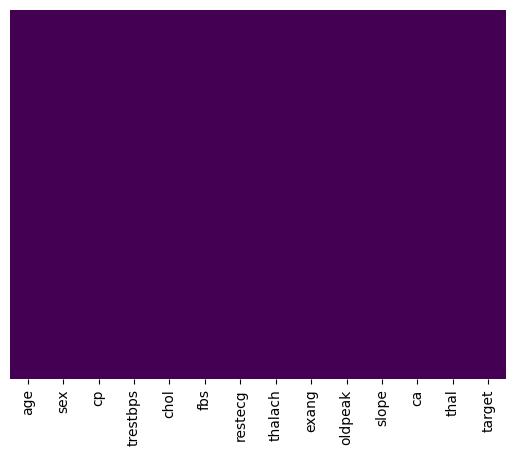

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='sex', ylabel='count'>

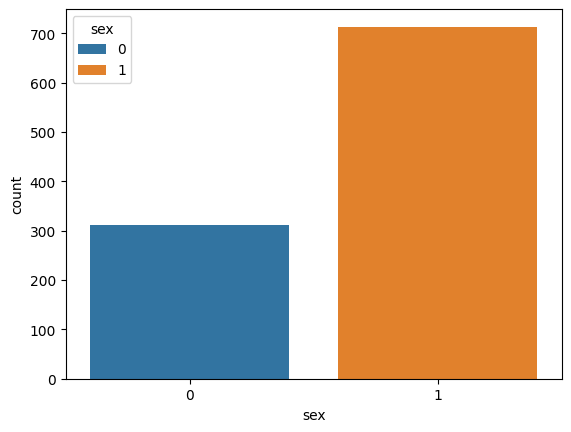

In [21]:
sns.countplot(x="sex",data=df,hue="sex")

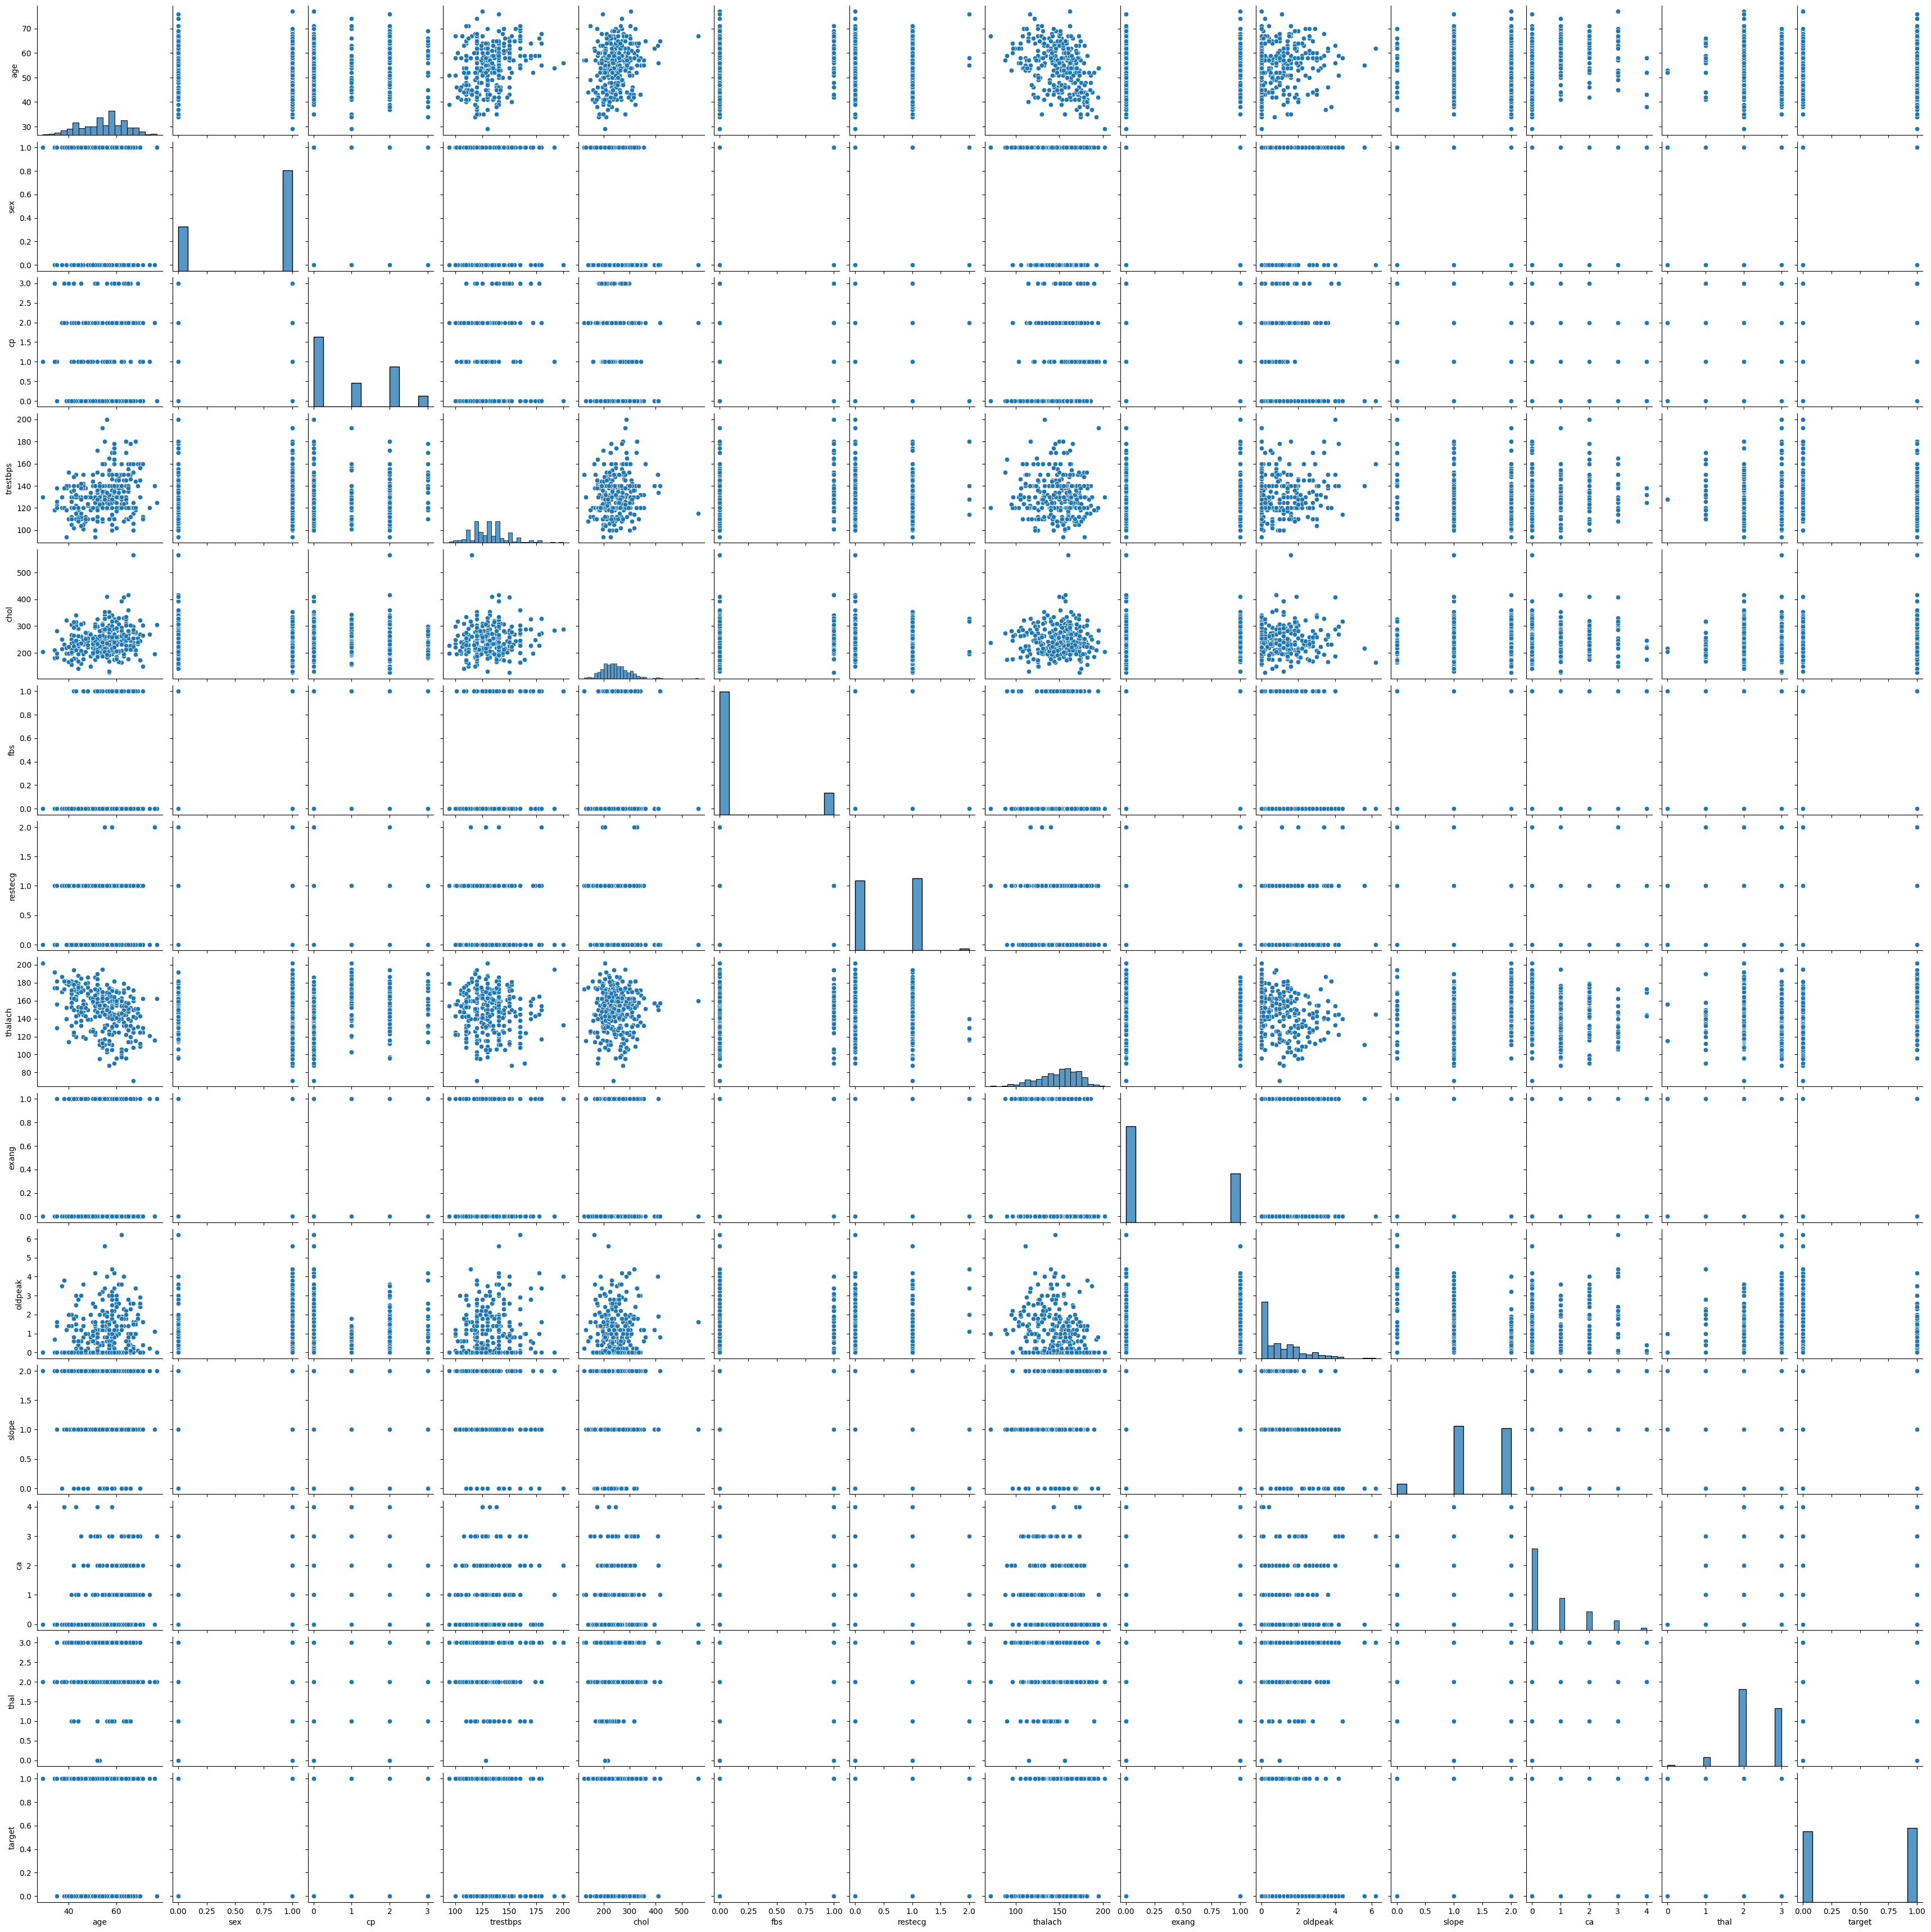

In [22]:
sns.pairplot(data=df)

In [24]:
df.dropna(inplace=True)

<Axes: xlabel='sex', ylabel='age'>

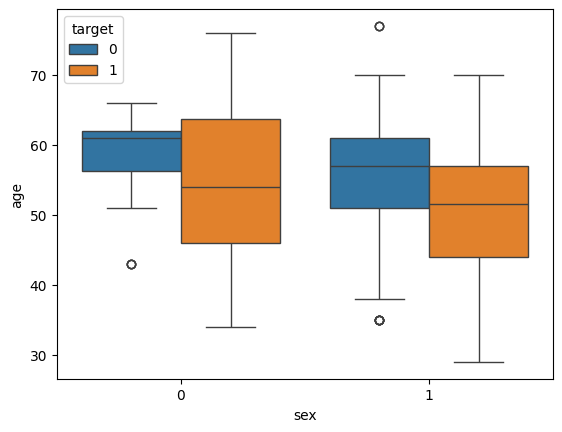

In [26]:
sns.boxplot(data=df,x="sex",y="age",hue="target")

In [27]:
X = df.drop('target', axis=1)
y = df['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = KNeighborsClassifier(n_neighbors=5)

In [30]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)

In [33]:
accuracy

0.7317073170731707

In [34]:
joblib.dump(model, 'heart_disease.joblib')

['heart_disease.joblib']

In [35]:
with open('heart_disease.pkl', 'wb') as f:
    pickle.dump(model, f)